In [1]:
import pandas as pd
import random

# READING DATAFRAME


In [2]:
df = pd.read_csv("ds_salaries.csv")
print(df.columns)

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')


In [3]:
from utils import generate_working_hour_means, generate_working_hours

distribution_mean = generate_working_hour_means(df)
df = generate_working_hours(df, distribution_mean)

In [4]:
print(df.weekly_hours)

0       42.893607
1       34.166154
2       37.693760
3       43.980625
4       43.992864
          ...    
3750    40.689806
3751    30.726686
3752    35.298486
3753    36.993818
3754    34.836292
Name: weekly_hours, Length: 3755, dtype: float64


In [5]:
import numpy as np

# Define a function to generate ages based on experience level
def generate_age(experience_level):
    if experience_level == "SE":
        # Normal distribution, most between 35 and 45
        return int(np.random.normal(loc=40, scale=5))
    elif experience_level == "EX":
        # Most between 47.5 and 57.5
        return int(np.random.normal(loc=52.5, scale=5))
    elif experience_level == "MI":
        return int(np.random.normal(loc=30, scale=5))  # Most between 25 and 35
    elif experience_level == "EN":
        # Most between 18 and 25
        return int(np.random.normal(loc=21.5, scale=2.5))
    else:
        return None


# Apply the function to create the 'age' column
df['age'] = df['experience_level'].apply(generate_age)

In [6]:

# Define a function to generate gender based on salary

def generate_gender(salary):
    # Adjust mean and standard deviation as needed
    male_mean, male_std = 80000, 15000
    female_mean, female_std = 60000, 15000

    # Generate salary based on gender
    if np.random.rand() < 0.5:  # 50% chance for each gender
        return "Male" if salary > np.random.normal(male_mean, male_std) else "Female"
    else:
        return "Female" if salary < np.random.normal(female_mean, female_std) else "Male"


# Apply the function to create the 'gender' column
df['gender'] = df['salary_in_usd'].apply(generate_gender)

In [7]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender'],
      dtype='object')

In [8]:
# Generate random birthday based on their already generated age
def generate_birthday(row):
    birth_year = row['work_year'] - row['age']
    birth_month = np.random.randint(1, 13)  # Random month between 1 and 12
    birth_day = np.random.randint(1, 29)  # Random day, simplified to 28 to accommodate all months
    birth_hour = np.random.randint(0, 24)  # Random hour
    birth_minute = np.random.randint(0, 60)  # Random minute
    birth_second = np.random.randint(0, 60)  # Random second
    # Combine into a birthday string
    birthday = f"{birth_year}-{birth_month:02d}-{birth_day:02d} {birth_hour:02d}:{birth_minute:02d}:{birth_second:02d}"
    return birthday

# Apply function to generate birthday for each row
df['birthday'] = df.apply(generate_birthday, axis=1)

# Display the updated DataFrame
df[['work_year', 'age', 'gender', 'birthday']]


,work_year,age,gender,birthday
0,2023,43,Male,1980-12-09 07:44:12
1,2023,30,Female,1993-07-01 03:29:42
2,2023,33,Female,1990-02-11 06:26:21
3,2023,32,Male,1991-09-03 07:38:44
4,2023,43,Male,1980-10-09 04:20:06
...,...,...,...,...
3750,2020,42,Male,1978-12-27 17:04:48
3751,2021,26,Male,1995-10-13 17:24:47
3752,2020,20,Male,2000-06-08 05:19:04
3753,2020,22,Male,1998-04-27 11:20:32


In [9]:
countries_df = df['employee_residence'].value_counts().reset_index()
countries_df.columns = ['Country Code', 'Count']
countries_df.to_excel('countries_df.xlsx')

/var/folders/ck/qnhpj7xj5f92bf7fj7w9b6kr0000gn/T/ipykernel_17818/3447105332.py:3: UserWarning: Pandas requires version '3.0.5' or newer of 'xlsxwriter' (version '3.0.1' currently installed).
  countries_df.to_excel('countries_df.xlsx')


In [10]:
# Generate a birth longitude and latitute (it is necessary for birthcharts), we will assume they are all born in their country of residence
# and in the same central point within that country

country_coordinates = {
    'US': (-77.0369, 38.9072),  # Washington, D.C., USA
    'GB': (-0.1278, 51.5074),   # London, UK
    'CA': (-75.6972, 45.4215),  # Ottawa, Canada
    'ES': (-3.7038, 40.4168),   # Madrid, Spain
    'IN': (77.2090, 28.6139),   # New Delhi, India
    'DE': (13.4050, 52.5200),   # Berlin, Germany
    'FR': (2.3522, 48.8566),    # Paris, France
    'PT': (-9.1393, 38.7223),   # Lisbon, Portugal
    'BR': (-47.8825, -15.7942), # Brasília, Brazil
    'GR': (23.7275, 37.9838),   # Athens, Greece
    'NL': (4.9041, 52.3676),    # Amsterdam, Netherlands
    'AU': (149.1300, -35.2809), # Canberra, Australia
    'MX': (-99.1332, 19.4326),  # Mexico City, Mexico
    'IT': (12.4964, 41.9028),   # Rome, Italy
    'PK': (73.0479, 33.6844),   # Islamabad, Pakistan
    'IE': (-6.2603, 53.3498),   # Dublin, Ireland
    'JP': (139.6917, 35.6895),  # Tokyo, Japan
    'NG': (7.4951, 9.0579),     # Abuja, Nigeria
    'AR': (-58.3816, -34.6037), # Buenos Aires, Argentina
    'PL': (21.0122, 52.2297),   # Warsaw, Poland
    'AT': (16.3738, 48.2082),   # Vienna, Austria
    'SG': (103.8198, 1.3521),     # Singapore
    'TR': (32.8597, 39.9334),     # Ankara, Turkey
    'PR': (-66.1057, 18.4655),    # San Juan, Puerto Rico
    'BE': (4.3517, 50.8503),      # Brussels, Belgium
    'CH': (7.4474, 46.9479),      # Bern, Switzerland
    'UA': (30.5234, 50.4501),     # Kyiv, Ukraine
    'CO': (-74.0721, 4.7110),     # Bogotá, Colombia
    'LV': (24.1052, 56.9496),     # Riga, Latvia
    'SI': (14.5058, 46.0569),     # Ljubljana, Slovenia
    'RU': (37.6173, 55.7558),     # Moscow, Russia
    'VN': (105.8342, 21.0278),    # Hanoi, Vietnam
    'HR': (15.9819, 45.8150),     # Zagreb, Croatia
    'TH': (100.5018, 13.7563),    # Bangkok, Thailand
    'BO': (-68.1193, -16.4897),   # Sucre, Bolivia
    'DK': (12.5683, 55.6761),     # Copenhagen, Denmark
    'HU': (19.0402, 47.4979),     # Budapest, Hungary
    'RO': (26.1025, 44.4268),     # Bucharest, Romania
    'AE': (54.3773, 24.4539),     # Abu Dhabi, United Arab Emirates
    'KE': (36.8219, -1.2921),     # Nairobi, Kenya
    'LT': (25.2799, 54.6872),     # Vilnius, Lithuania
    'SE': (18.0686, 59.3293),     # Stockholm, Sweden
    'UZ': (69.2401, 41.2995),     # Tashkent, Uzbekistan
    'HK': (114.1095, 22.3964),    # Hong Kong
    'CF': (18.5582, 4.3947),      # Bangui, Central African Republic
    'CZ': (14.4378, 50.0755),     # Prague, Czech Republic
    'CL': (-70.6483, -33.4489),   # Santiago, Chile
    'FI': (24.9384, 60.1699),     # Helsinki, Finland
    'AS': (-170.1322, -14.2756),  # Pago Pago, American Samoa
    'PH': (120.9842, 14.5995),    # Manila, Philippines
    'GH': (-0.1869, 5.6037),      # Accra, Ghana
    'AM': (44.5092, 40.1872),     # Yerevan, Armenia
    'BA': (18.4131, 43.8563),     # Sarajevo, Bosnia and Herzegovina
    'BG': (23.3219, 42.6977),     # Sofia, Bulgaria
    'HN': (-87.2068, 14.0723),    # Tegucigalpa, Honduras
    'EE': (24.7536, 59.4370),     # Tallinn, Estonia
    'CY': (33.3823, 35.1856),     # Nicosia, Cyprus
    'KW': (47.4818, 29.3117),     # Kuwait City, Kuwait
    'TN': (10.1658, 36.8188),     # Tunis, Tunisia
    'DZ': (3.0588, 36.7538),      # Algiers, Algeria
    'IQ': (44.3661, 33.3152),     # Baghdad, Iraq
    'MK': (21.4275, 41.9981),     # Skopje, North Macedonia
    'CN': (116.4074, 39.9042),    # Beijing, China
    'SK': (17.1077, 48.1486),     # Bratislava, Slovakia
    'IR': (51.3890, 35.6892),     # Tehran, Iran
    'MA': (-6.8498, 33.9716),     # Rabat, Morocco
    'IL': (35.2137, 31.7683),     # Jerusalem, Israel
    'CR': (-84.0833, 9.9333),     # San José, Costa Rica
    'EG': (31.2357, 30.0444),     # Cairo, Egypt
    'DO': (-69.9312, 18.4861),    # Santo Domingo, Dominican Republic
    'ID': (106.8456, -6.2088),    # Jakarta, Indonesia
    'MY': (101.6869, 3.1390),     # Kuala Lumpur, Malaysia
    'JE': (-2.1312, 49.2138),     # Saint Helier, Jersey
    'RS': (20.4489, 44.7866),     # Belgrade, Serbia
    'NZ': (174.7762, -41.2865),   # Wellington, New Zealand
    'MD': (28.8575, 47.0105),     # Chișinău, Moldova
    'LU': (6.1303, 49.6116),      # Luxembourg City, Luxembourg
    'MT': (14.5146, 35.8989),     # Valletta, Malta
}

# Function to retrieve coordinates based on country code
def get_coordinates(country_code):
    return country_coordinates.get(country_code, (None, None))
df['longitude'] = df['employee_residence'].apply(lambda x: get_coordinates(x)[0])
df['latitude'] = df['employee_residence'].apply(lambda x: get_coordinates(x)[1])

df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,weekly_hours,age,gender,birthday,longitude,latitude
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L,42.893607,43,Male,1980-12-09 07:44:12,-3.7038,40.4168
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S,34.166154,30,Female,1993-07-01 03:29:42,-77.0369,38.9072
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S,37.693760,33,Female,1990-02-11 06:26:21,-77.0369,38.9072
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M,43.980625,32,Male,1991-09-03 07:38:44,-75.6972,45.4215
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M,43.992864,43,Male,1980-10-09 04:20:06,-75.6972,45.4215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L,40.689806,42,Male,1978-12-27 17:04:48,-77.0369,38.9072
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L,30.726686,26,Male,1995-10-13 17:24:47,-77.0369,38.9072
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S,35.298486,20,Male,2000-06-08 05:19:04,-77.0369,38.9072
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L,36.993818,22,Male,1998-04-27 11:20:32,-77.0369,38.9072


In [11]:

from datetime import datetime
import swisseph as swe
import pandas as pd

def calculate_celestial_bodies(row):
    from datetime import datetime
    import swisseph as swe
    
    birth_datetime = datetime.strptime(row['birthday'], '%Y-%m-%d %H:%M:%S')
    jd_ut = swe.julday(birth_datetime.year, birth_datetime.month, birth_datetime.day,
                       birth_datetime.hour + birth_datetime.minute / 60 + birth_datetime.second / 3600)
    
    sun_pos = swe.calc_ut(jd_ut, swe.SUN)[0][0]
    moon_pos = swe.calc_ut(jd_ut, swe.MOON)[0][0]
    asc_pos = swe.houses(jd_ut, row['latitude'], row['longitude'], b'P')[0][0]
    
    return pd.Series({
        'sun_position': sun_pos,
        'moon_position': moon_pos,
        'ascendant': asc_pos,
    })


In [12]:
celestial_results = df.apply(calculate_celestial_bodies, axis=1)
for col in celestial_results.columns:
    df[col] = celestial_results[col]

In [13]:
# Define the function to get zodiac sign based on longitude
def get_zodiac_sign(longitude):
    sign_ranges = [
        ("Aries", (0, 30)), ("Taurus", (30, 60)), ("Gemini", (60, 90)),
        ("Cancer", (90, 120)), ("Leo", (120, 150)), ("Virgo", (150, 180)),
        ("Libra", (180, 210)), ("Scorpio", (210, 240)), ("Sagittarius", (240, 270)),
        ("Capricorn", (270, 300)), ("Aquarius", (300, 330)), ("Pisces", (330, 360))
    ]
    
    for sign, (start, end) in sign_ranges:
        if start <= longitude < end:
            return sign
    
    # Handle the special case for Pisces (330° to 360° and 0° to 30°)
    if longitude == 360 or longitude < 30:
        return "Pisces"
    
    return "Unknown"

# Apply the get_zodiac_sign function to each column and create new columns for zodiac sign names
df['sun_sign'] = df['sun_position'].apply(get_zodiac_sign)
df['moon_sign'] = df['moon_position'].apply(get_zodiac_sign)
df['ascendant_sign'] = df['ascendant'].apply(get_zodiac_sign)

# Display the DataFrame with zodiac sign names
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,gender,birthday,longitude,latitude,sun_position,moon_position,ascendant,sun_sign,moon_sign,ascendant_sign
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,Male,1980-12-09 07:44:12,-3.7038,40.4168,257.401458,277.114331,260.147520,Sagittarius,Capricorn,Sagittarius
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,Female,1993-07-01 03:29:42,-77.0369,38.9072,99.319587,244.009004,334.753294,Cancer,Sagittarius,Pisces
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,Female,1990-02-11 06:26:21,-77.0369,38.9072,322.265754,159.759470,236.446358,Aquarius,Virgo,Scorpio
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,Male,1991-09-03 07:38:44,-75.6972,45.4215,160.319820,90.785619,128.067509,Virgo,Cancer,Leo
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,Male,1980-10-09 04:20:06,-75.6972,45.4215,196.029896,196.712243,117.653729,Libra,Libra,Cancer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,Male,1978-12-27 17:04:48,-77.0369,38.9072,275.592914,246.544665,8.342296,Capricorn,Sagittarius,Aries
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,Male,1995-10-13 17:24:47,-77.0369,38.9072,199.898963,77.656764,275.123571,Libra,Gemini,Capricorn
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,Male,2000-06-08 05:19:04,-77.0369,38.9072,77.725256,156.001009,342.799089,Gemini,Virgo,Pisces
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,Male,1998-04-27 11:20:32,-77.0369,38.9072,37.002448,50.934900,57.276482,Taurus,Taurus,Taurus


In [14]:
# Define a dictionary mapping zodiac signs to their elemental types
element_mapping = {
    'Aries': 'Fire', 'Taurus': 'Earth', 'Gemini': 'Air', 'Cancer': 'Water',
    'Leo': 'Fire', 'Virgo': 'Earth', 'Libra': 'Air', 'Scorpio': 'Water',
    'Sagittarius': 'Fire', 'Capricorn': 'Earth', 'Aquarius': 'Air', 'Pisces': 'Water'
}

# Map the zodiac signs to their elemental types and create a new column for the sign type
df['sign_type'] = df['sun_sign'].map(element_mapping)

# Display the DataFrame with zodiac sign names and sign types
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,birthday,longitude,latitude,sun_position,moon_position,ascendant,sun_sign,moon_sign,ascendant_sign,sign_type
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,1980-12-09 07:44:12,-3.7038,40.4168,257.401458,277.114331,260.147520,Sagittarius,Capricorn,Sagittarius,Fire
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,1993-07-01 03:29:42,-77.0369,38.9072,99.319587,244.009004,334.753294,Cancer,Sagittarius,Pisces,Water
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,1990-02-11 06:26:21,-77.0369,38.9072,322.265754,159.759470,236.446358,Aquarius,Virgo,Scorpio,Air
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,1991-09-03 07:38:44,-75.6972,45.4215,160.319820,90.785619,128.067509,Virgo,Cancer,Leo,Earth
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,1980-10-09 04:20:06,-75.6972,45.4215,196.029896,196.712243,117.653729,Libra,Libra,Cancer,Air
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,1978-12-27 17:04:48,-77.0369,38.9072,275.592914,246.544665,8.342296,Capricorn,Sagittarius,Aries,Earth
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,1995-10-13 17:24:47,-77.0369,38.9072,199.898963,77.656764,275.123571,Libra,Gemini,Capricorn,Air
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,2000-06-08 05:19:04,-77.0369,38.9072,77.725256,156.001009,342.799089,Gemini,Virgo,Pisces,Air
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,1998-04-27 11:20:32,-77.0369,38.9072,37.002448,50.934900,57.276482,Taurus,Taurus,Taurus,Earth


In [15]:
import pandas as pd
import swisseph as swe

def assign_planets_to_houses(df):
    planets = {
        'Sun': swe.SUN,
        'Moon': swe.MOON,
        'Mercury': swe.MERCURY,
        'Venus': swe.VENUS,
        'Mars': swe.MARS,
        'Jupiter': swe.JUPITER,
        'Saturn': swe.SATURN,
        'Uranus': swe.URANUS,
        'Neptune': swe.NEPTUNE,
        'Pluto': swe.PLUTO,
    }

    # Initialize columns for each planet
    for planet in planets.keys():
        df[planet] = None

    house_system = 'P'  # Placidus

    for index, row in df.iterrows():
        try:
            jd = swe.julday(int(row['birthday'][:4]), int(row['birthday'][5:7]), int(row['birthday'][8:10]),
                            hour=int(row['birthday'][11:13]) + int(row['birthday'][14:16])/60 + int(row['birthday'][17:19])/3600)

            cusps, ascmc = swe.houses(jd, row['latitude'], row['longitude'], house_system.encode('utf-8'))

            for planet_name, planet_id in planets.items():
                planet_degree = swe.calc_ut(jd, planet_id)[0][0]
                house_num = None
                for i in range(1, 13):
                    if i == 12:
                        if planet_degree >= cusps[i] or planet_degree < cusps[1]:
                            house_num = i
                            break
                    else:
                        if cusps[i] <= planet_degree < cusps[i+1]:
                            house_num = i
                            break

                if house_num is not None:
                    df.at[index, planet_name] = house_num
        except Exception as e:
            print(f"An error occurred at index {index}: {e}")
            # Optionally, handle specific cases or log the error details

    return df

df= assign_planets_to_houses(df)

An error occurred at index 0: tuple index out of range
An error occurred at index 1: tuple index out of range
An error occurred at index 2: tuple index out of range
An error occurred at index 3: tuple index out of range
An error occurred at index 6: tuple index out of range
An error occurred at index 7: tuple index out of range
An error occurred at index 8: tuple index out of range
An error occurred at index 9: tuple index out of range
An error occurred at index 10: tuple index out of range
An error occurred at index 11: tuple index out of range
An error occurred at index 12: tuple index out of range
An error occurred at index 13: tuple index out of range
An error occurred at index 14: tuple index out of range
An error occurred at index 15: tuple index out of range
An error occurred at index 16: tuple index out of range
An error occurred at index 18: tuple index out of range
An error occurred at index 20: tuple index out of range
An error occurred at index 22: tuple index out of range


In [16]:
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,None,None,None,None,None,None,None,None,None,None
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,4,8,4,2,5,6,None,None,None,None
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,2,9,1,1,1,7,1,1,1,None
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,1,10,None,None,None,None,None,None,None,None
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,3,3,3,1,4,2,2,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,9,7,8,7,9,4,5,7,8,6
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,8,5,8,9,10,10,1,None,None,None
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,2,5,3,2,3,1,1,None,None,None
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,None,None,None,None,None,None,None,None,None,None


# DATA CLEANING


In [17]:
# check for missing
df.isnull().sum()


work_year                0
experience_level         0
employment_type          0
job_title                0
salary                   0
salary_currency          0
salary_in_usd            0
employee_residence       0
remote_ratio             0
company_location         0
company_size             0
weekly_hours             0
age                      0
gender                   0
birthday                 0
longitude                0
latitude                 0
sun_position             0
moon_position            0
ascendant                0
sun_sign                 0
moon_sign                0
ascendant_sign           0
sign_type                0
Sun                    889
Moon                  1566
Mercury               1760
Venus                 2028
Mars                  2309
Jupiter               2581
Saturn                2783
Uranus                2929
Neptune               2982
Pluto                 3082
dtype: int64

In [18]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender', 'birthday', 'longitude', 'latitude', 'sun_position',
       'moon_position', 'ascendant', 'sun_sign', 'moon_sign', 'ascendant_sign',
       'sign_type', 'Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto'],
      dtype='object')

In [19]:
df


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,None,None,None,None,None,None,None,None,None,None
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,4,8,4,2,5,6,None,None,None,None
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,2,9,1,1,1,7,1,1,1,None
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,1,10,None,None,None,None,None,None,None,None
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,3,3,3,1,4,2,2,4,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,...,9,7,8,7,9,4,5,7,8,6
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,...,8,5,8,9,10,10,1,None,None,None
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,...,2,5,3,2,3,1,1,None,None,None
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,...,None,None,None,None,None,None,None,None,None,None


In [20]:
# Check for duplicates
df.duplicated().sum()

0

In [21]:
columns_to_drop = ['longitude', 'latitude', 'sun_position', 'moon_position', 'ascendant']
df = df.drop(columns=columns_to_drop)
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size', 'weekly_hours',
       'age', 'gender', 'birthday', 'sun_sign', 'moon_sign', 'ascendant_sign',
       'sign_type', 'Sun', 'Moon', 'Mercury', 'Venus', 'Mars', 'Jupiter',
       'Saturn', 'Uranus', 'Neptune', 'Pluto'],
      dtype='object')

In [22]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,...,Sun,Moon,Mercury,Venus,Mars,Jupiter,Saturn,Uranus,Neptune,Pluto
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,...,None,None,None,None,None,None,None,None,None,None
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,...,4,8,4,2,5,6,None,None,None,None
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,...,2,9,1,1,1,7,1,1,1,None
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,...,1,10,None,None,None,None,None,None,None,None
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,...,3,3,3,1,4,2,2,4,4,3


In [23]:
df.to_csv('df_salaries.csv', index=False)

# Plots


In [24]:
df.remote_ratio.unique()

array([100,   0,  50])

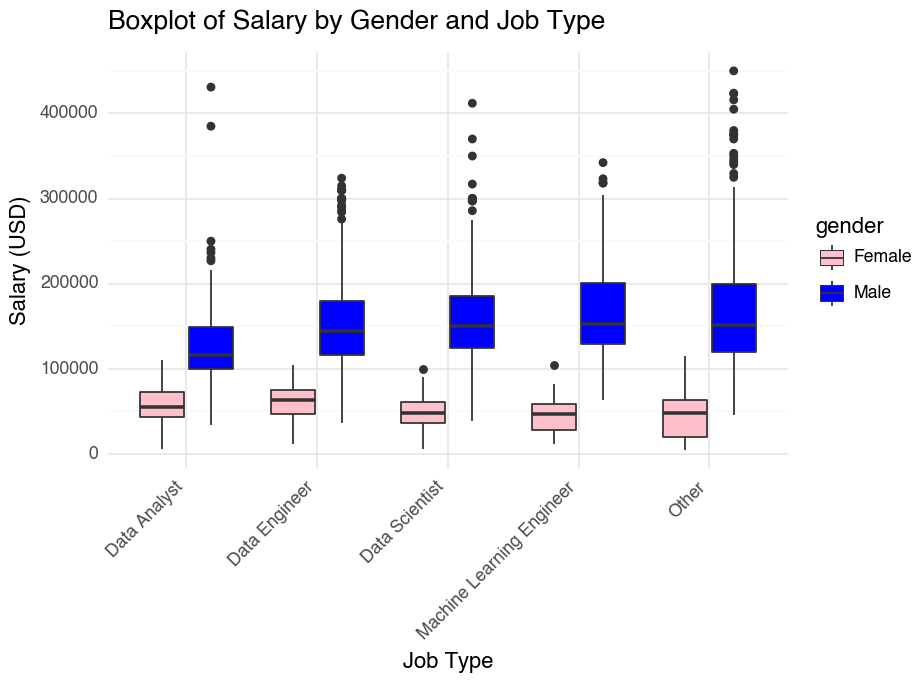

In [25]:
from plotnine import ggplot, aes, geom_boxplot, theme_minimal, labs, scale_fill_manual, theme, element_text


top_job_titles = df['job_title'].value_counts().nlargest(4).index
df['job_title_grouped'] = df['job_title'].apply(
    lambda x: x if x in top_job_titles else 'Other')

# Plotting using plotnine
plot = (
    ggplot(df, aes(x='job_title_grouped', y='salary_in_usd', fill='gender')) +
    geom_boxplot() +
    labs(title='Boxplot of Salary by Gender and Job Type', x='Job Type', y='Salary (USD)') +
    theme_minimal() +
    scale_fill_manual(values={'Male': 'blue', 'Female': 'pink'}) +
    # Set the angle to 45 degrees
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)

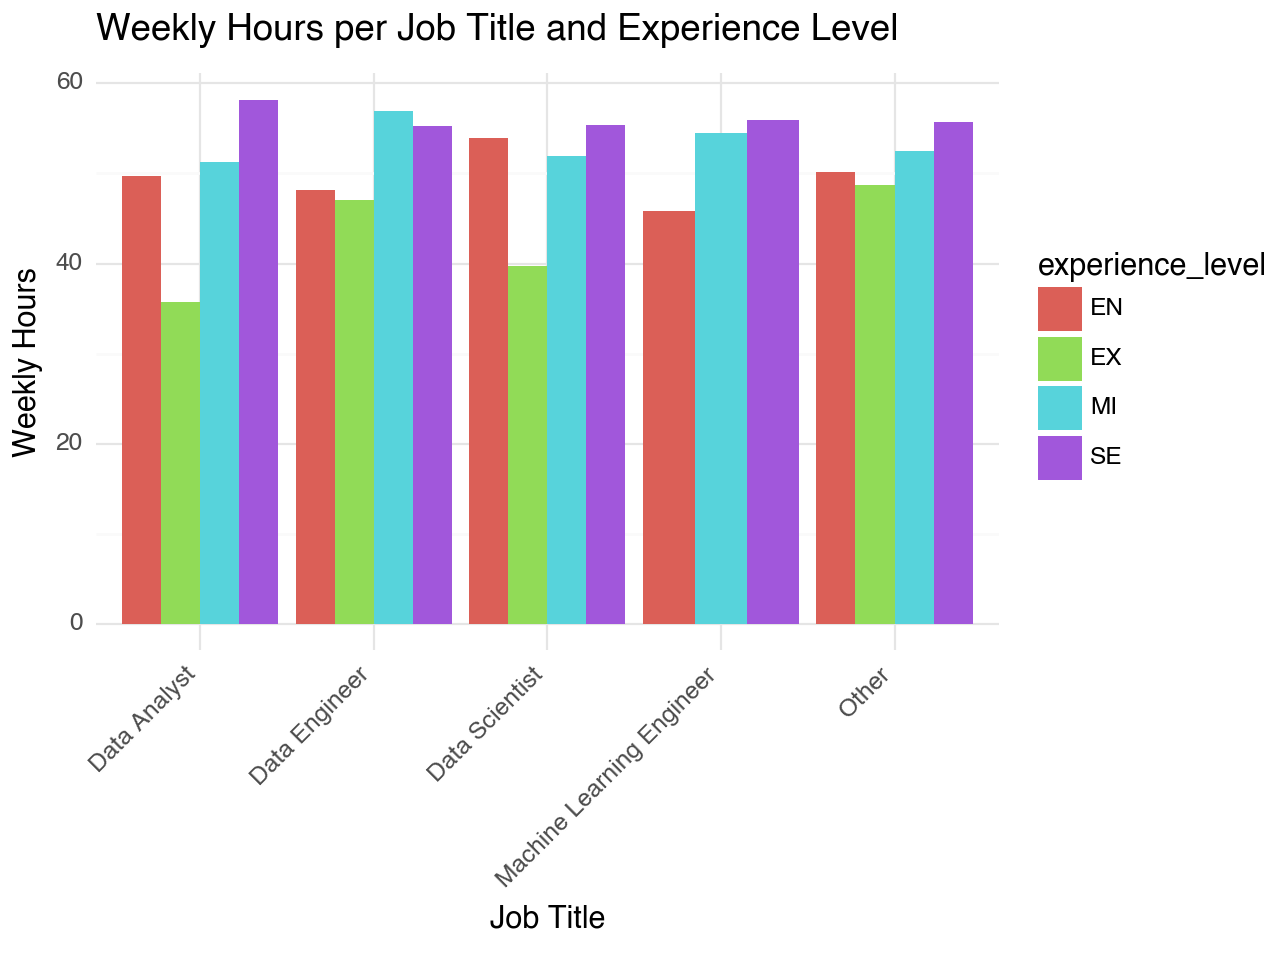

In [26]:

from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_text


top_job_titles = df['job_title'].value_counts().nlargest(4).index
df['job_title_grouped'] = df['job_title'].apply(
    lambda x: x if x in top_job_titles else 'Other')

# Plotting using plotnine
plot = (
    ggplot(df, aes(x='job_title_grouped', y='weekly_hours', fill='experience_level')) +
    geom_bar(stat='identity', position='dodge') +
    labs(title='Weekly Hours per Job Title and Experience Level',
         x='Job Title', y='Weekly Hours') +
    theme_minimal() +
    # Set the angle to 45 degrees
    theme(axis_text_x=element_text(angle=45, hjust=1))
)

# Show the plot
print(plot)

In [27]:
from plotnine import ggplot, aes, geom_bar, theme_minimal, labs, theme, element_blank
from plotnine.coords import coord_polar


plot = (
    ggplot(df, aes(x='', fill='remote_category')) +
    geom_bar(width=1, color='white') +
    coord_polar(theta='y') +
    labs(title='Remote Ratio Distribution',
         fill='Remote Category') +
    theme_minimal() +
    theme(axis_text_x=element_blank())  # Remove x-axis labels
)

# Show the plot
print(plot)

ImportError: cannot import name 'coord_polar' from 'plotnine.coords' (/opt/anaconda3/lib/python3.9/site-packages/plotnine/coords/__init__.py)

## Astrology charts

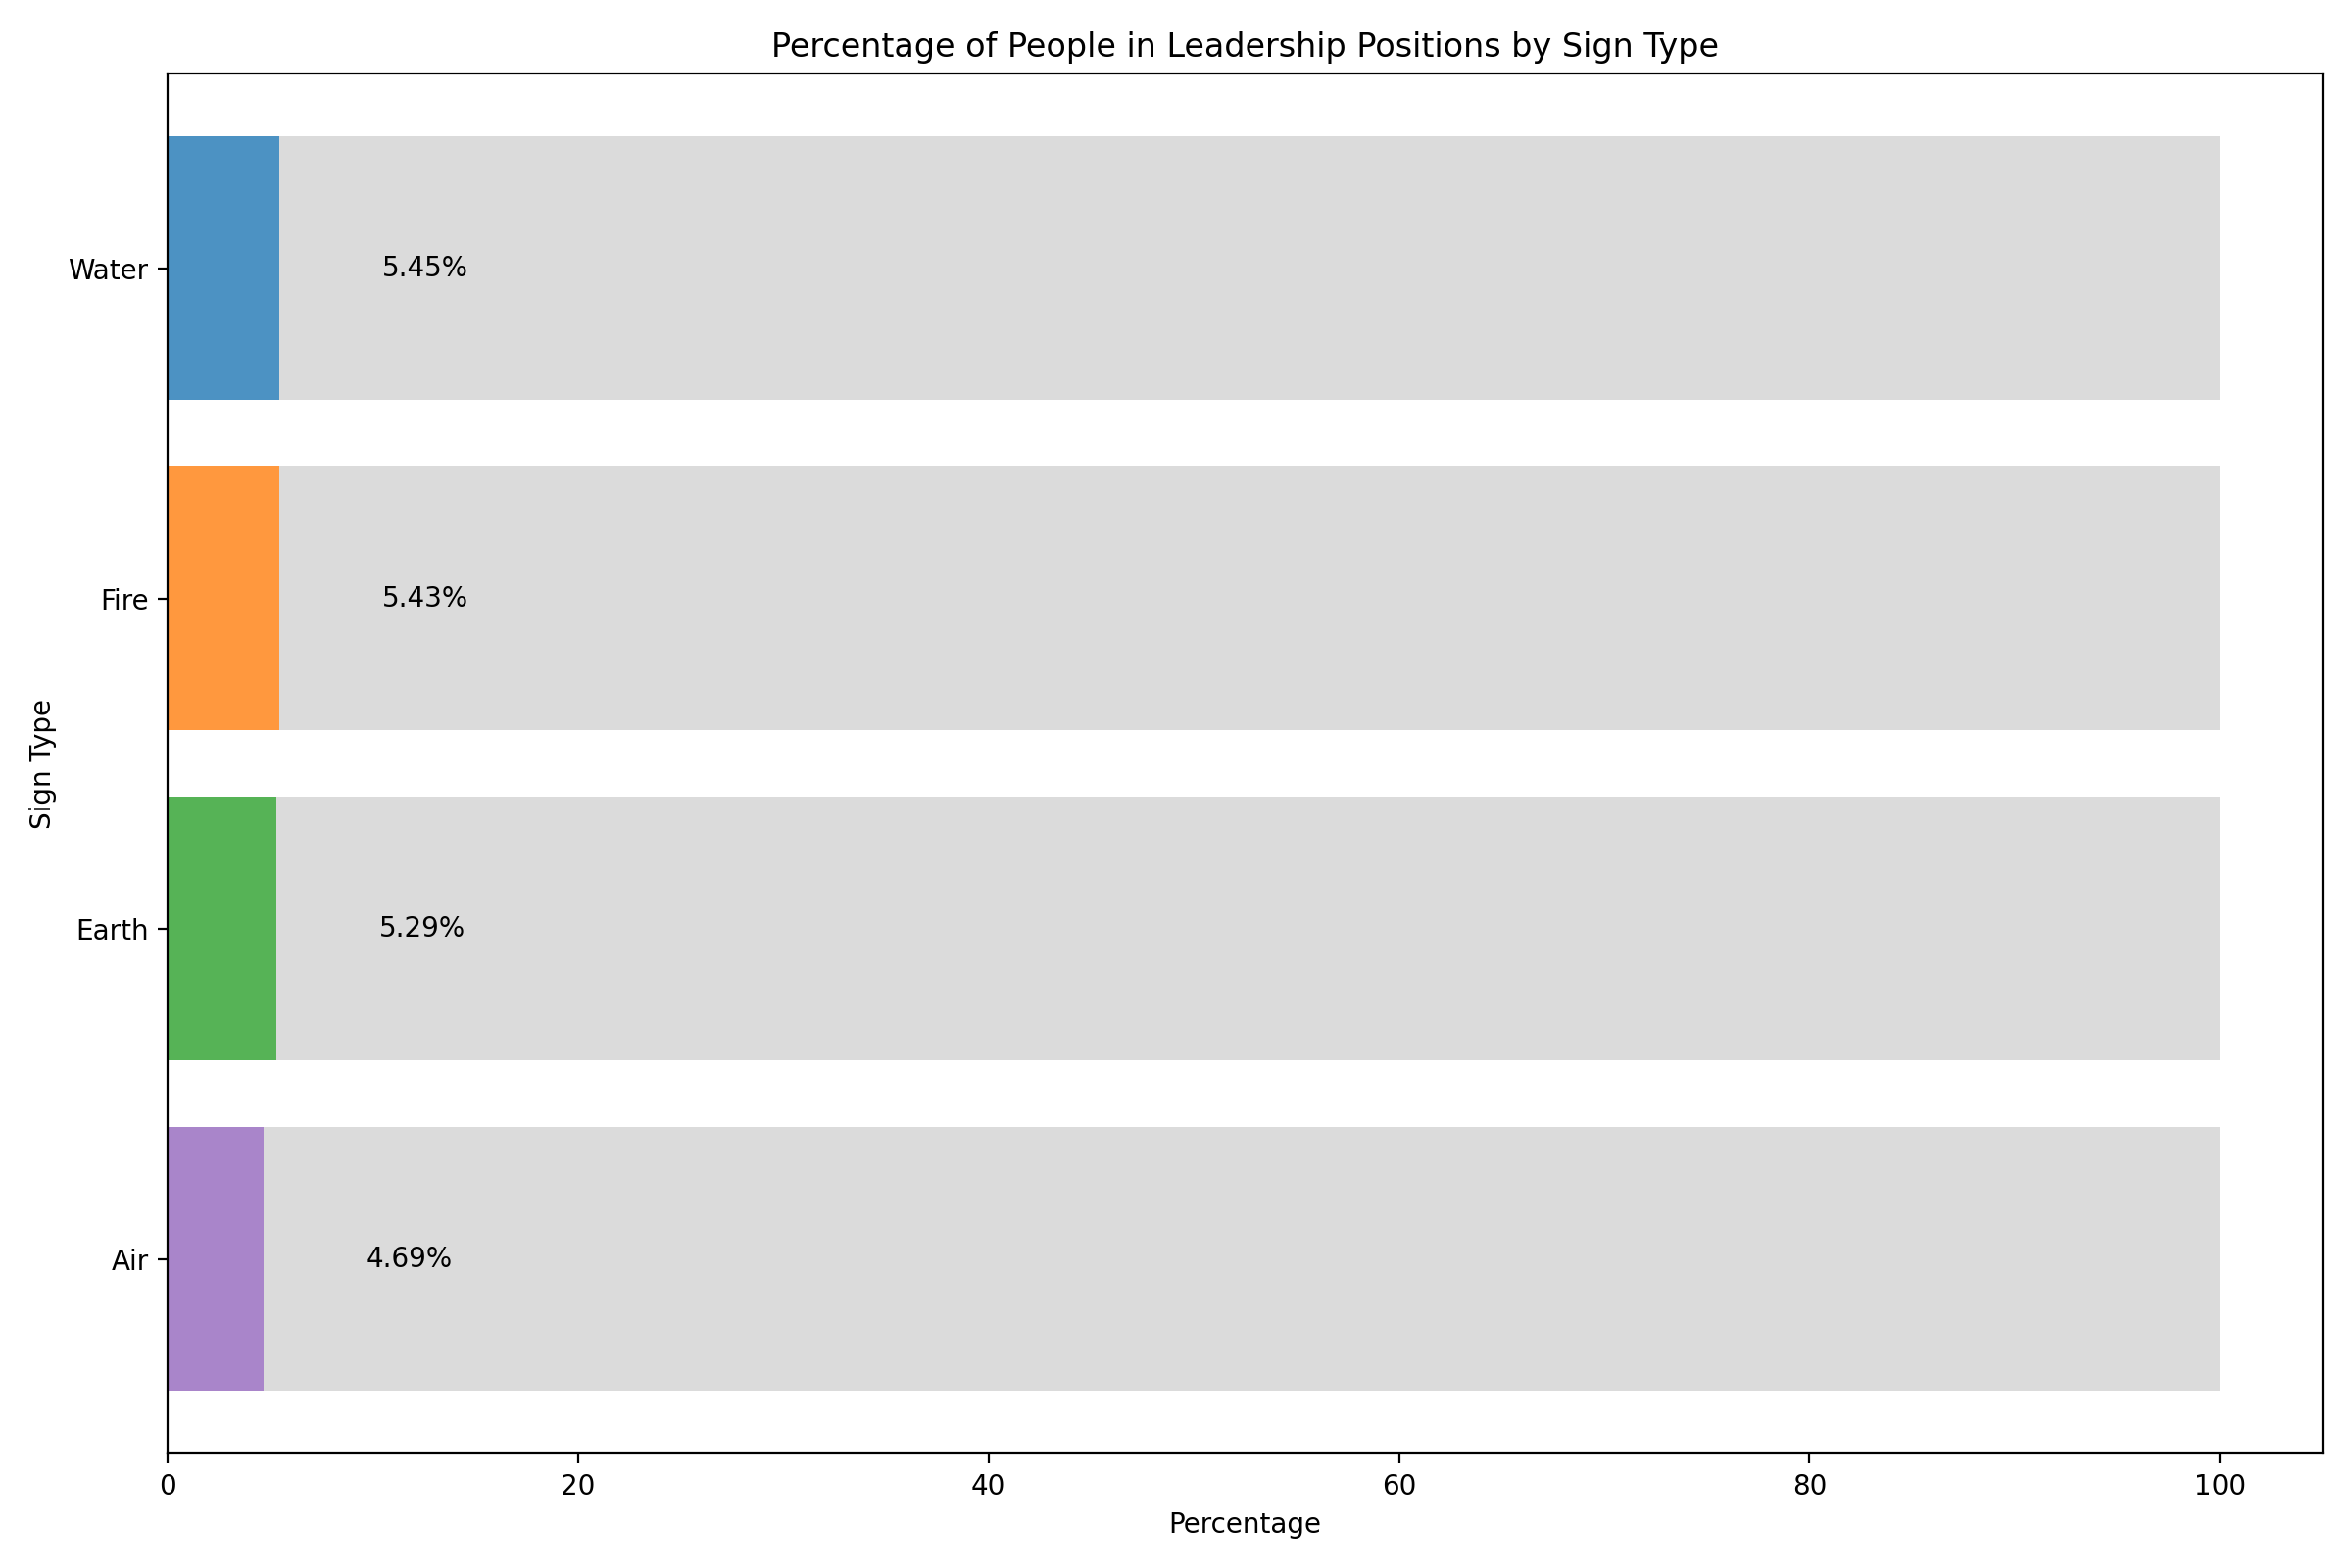

In [ ]:
#1) ⁠sun sign and job role: are fire signs more likely to be in leadership positions?
import matplotlib.pyplot as plt
import pandas as pd

# Defining a variable that categorises into leadership postitions or not
leadership_keywords = ['Lead', 'Manager', 'Director', 'Head', 'Principal']
df['is_leadership'] = df['job_title'].apply(lambda x: any(keyword in x for keyword in leadership_keywords))


# Calculate the % of leadership roles for each sign type
leadership_by_sign_type = df.groupby('sign_type')['is_leadership'].value_counts(normalize=True).unstack() * 100
leadership_percentages_filtered = leadership_by_sign_type[True]  # Assuming True represents leadership roles

#Calculate the  % of non-leadership roles
leadership_percentages_non_leadership = 100 - leadership_percentages_filtered

#choose and map pretty colours
sign_colors = {
    'Fire': '#ff7f0e',  # Orange
    'Water': '#1f77b4',  # Blue
    'Air': '#9467bd',    # Purple
    'Earth': '#2ca02c'   # Green
}

colors_filtered = [sign_colors[sign] for sign in leadership_percentages_filtered.index]

fig, ax = plt.subplots(figsize=(12, 8))

# Plot the leadership percentage
bars = ax.barh(leadership_percentages_filtered.index, leadership_percentages_filtered, color=[colors_filtered[i] for i in range(len(leadership_percentages_filtered))], alpha=0.8, label='Leadership')

# Add the non-leadership percentage with lighter grey to fill up to 100%
ax.barh(leadership_percentages_filtered.index, leadership_percentages_non_leadership, left=leadership_percentages_filtered, color='lightgrey', alpha=0.8, label='Non-Leadership')

# Annotating percentages on the bars for leadership positions
for bar, value in zip(bars, leadership_percentages_filtered):
    width = bar.get_width()
    ax.text(width + 5, bar.get_y() + bar.get_height() / 2, f'{value:.2f}%', va='center')

# Setting titles and labels
ax.set_title('Percentage of People in Leadership Positions by Sign Type')
ax.set_xlabel('Percentage')
ax.set_ylabel('Sign Type')



plt.tight_layout()
plt.show()

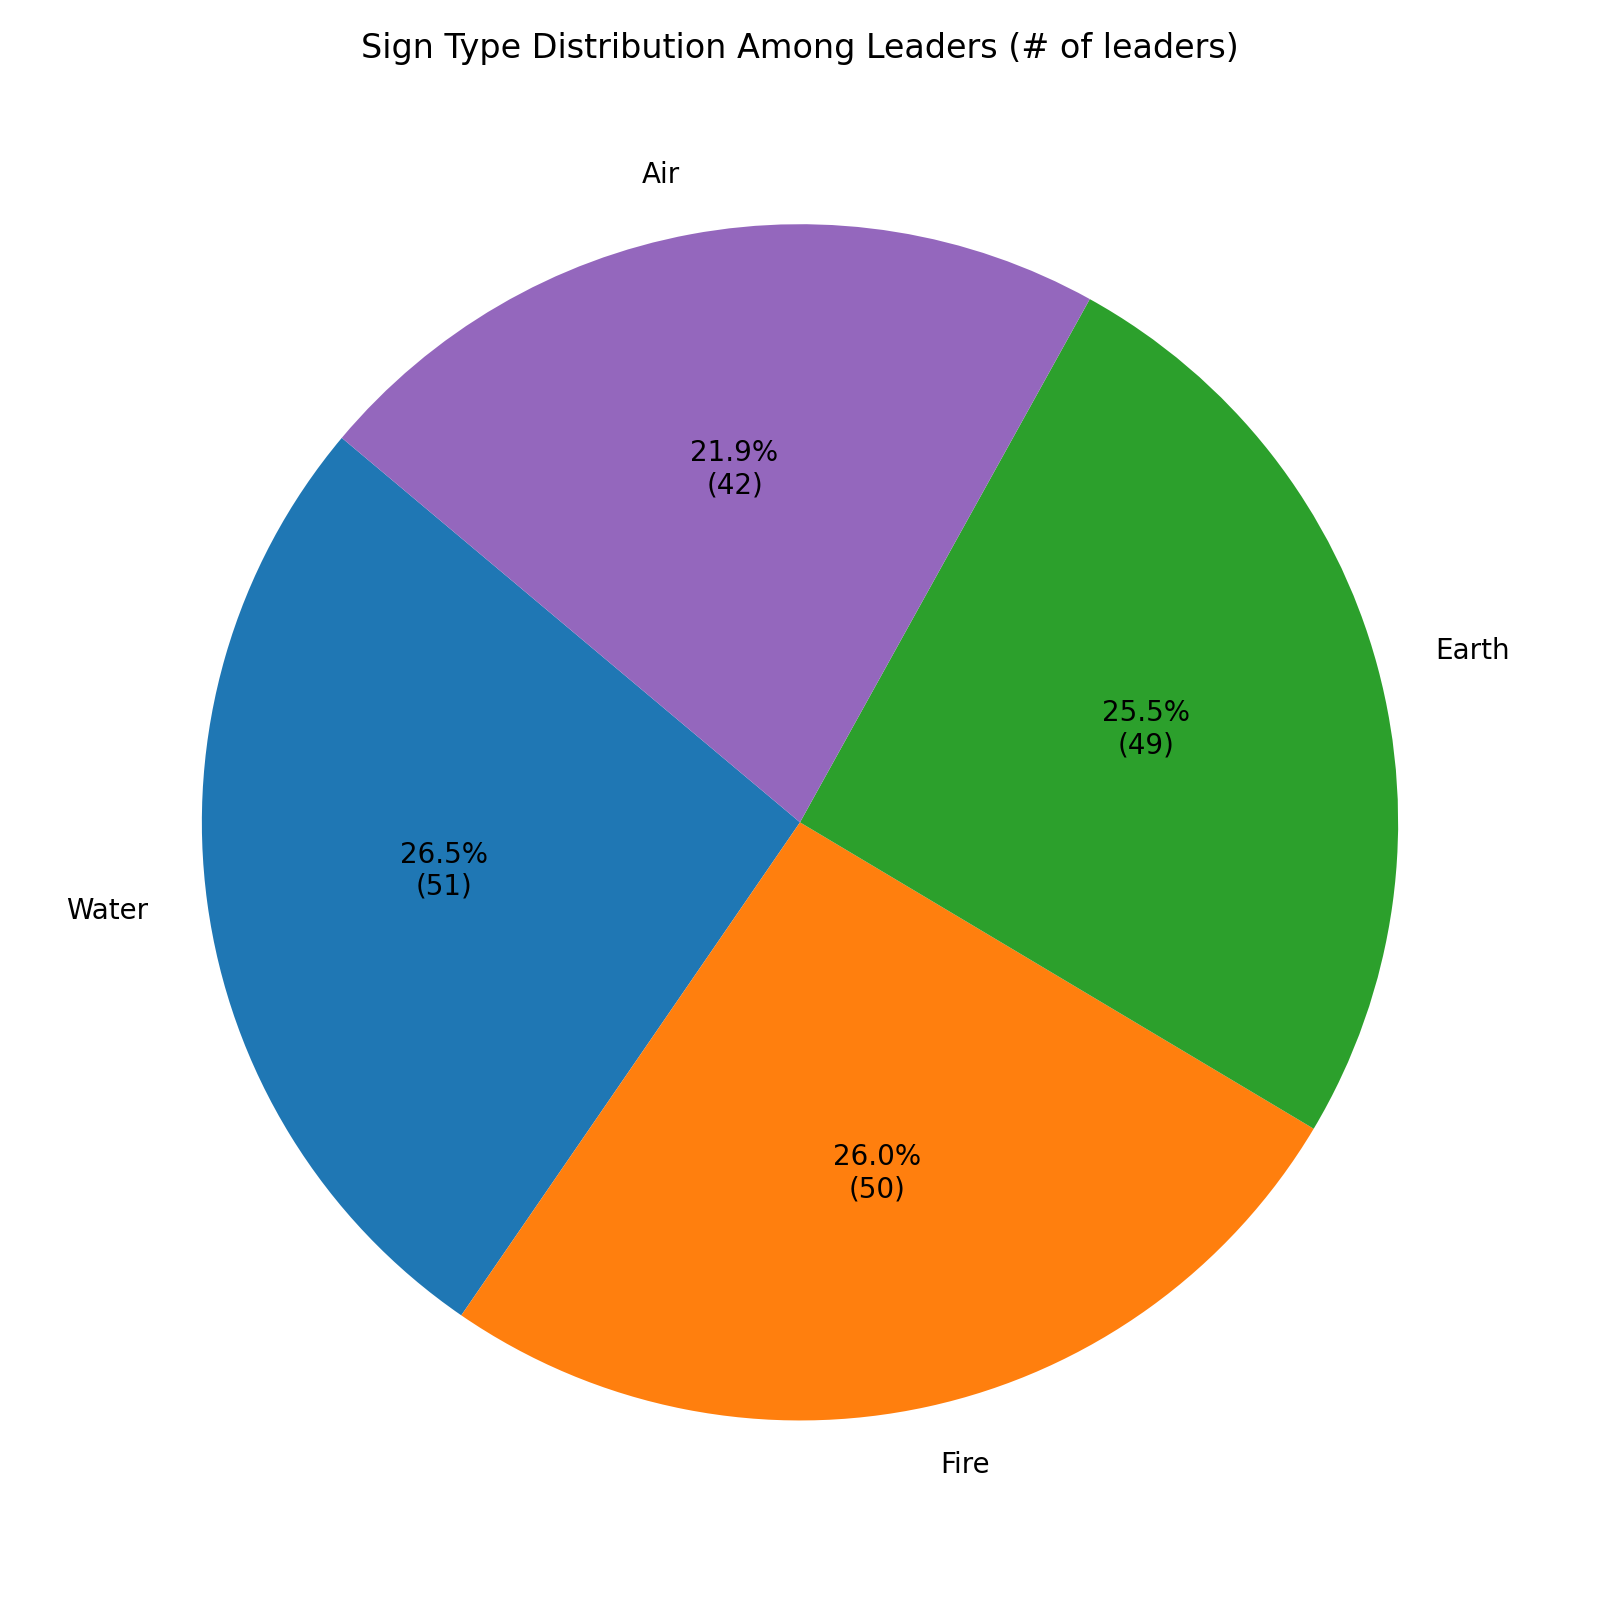

sign_type
Water    52
Fire     51
Earth    50
Air      43
Name: count, dtype: int64

In [ ]:
# Calculate the number of leaders for each sign type
leaders_count_by_sign_type = df[df['is_leadership']]['sign_type'].value_counts()

# Exclude 'Other' from the leaders count if present
leaders_count_by_sign_type_filtered = leaders_count_by_sign_type.drop('Other', errors='ignore')

# Prepare the pie chart with filtered data
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(leaders_count_by_sign_type_filtered, labels=leaders_count_by_sign_type_filtered.index, autopct=lambda p: '{:.1f}%\n({:d})'.format(p, int(p/100.*leaders_count_by_sign_type_filtered.sum())), startangle=140, colors=[sign_colors[sign] for sign in leaders_count_by_sign_type_filtered.index])

# Setting the title
ax.set_title('Sign Type Distribution Among Leaders (# of leaders)')

plt.tight_layout()
plt.show()

# Displaying the number of leaders for each sign type for reference
leaders_count_by_sign_type_filtered



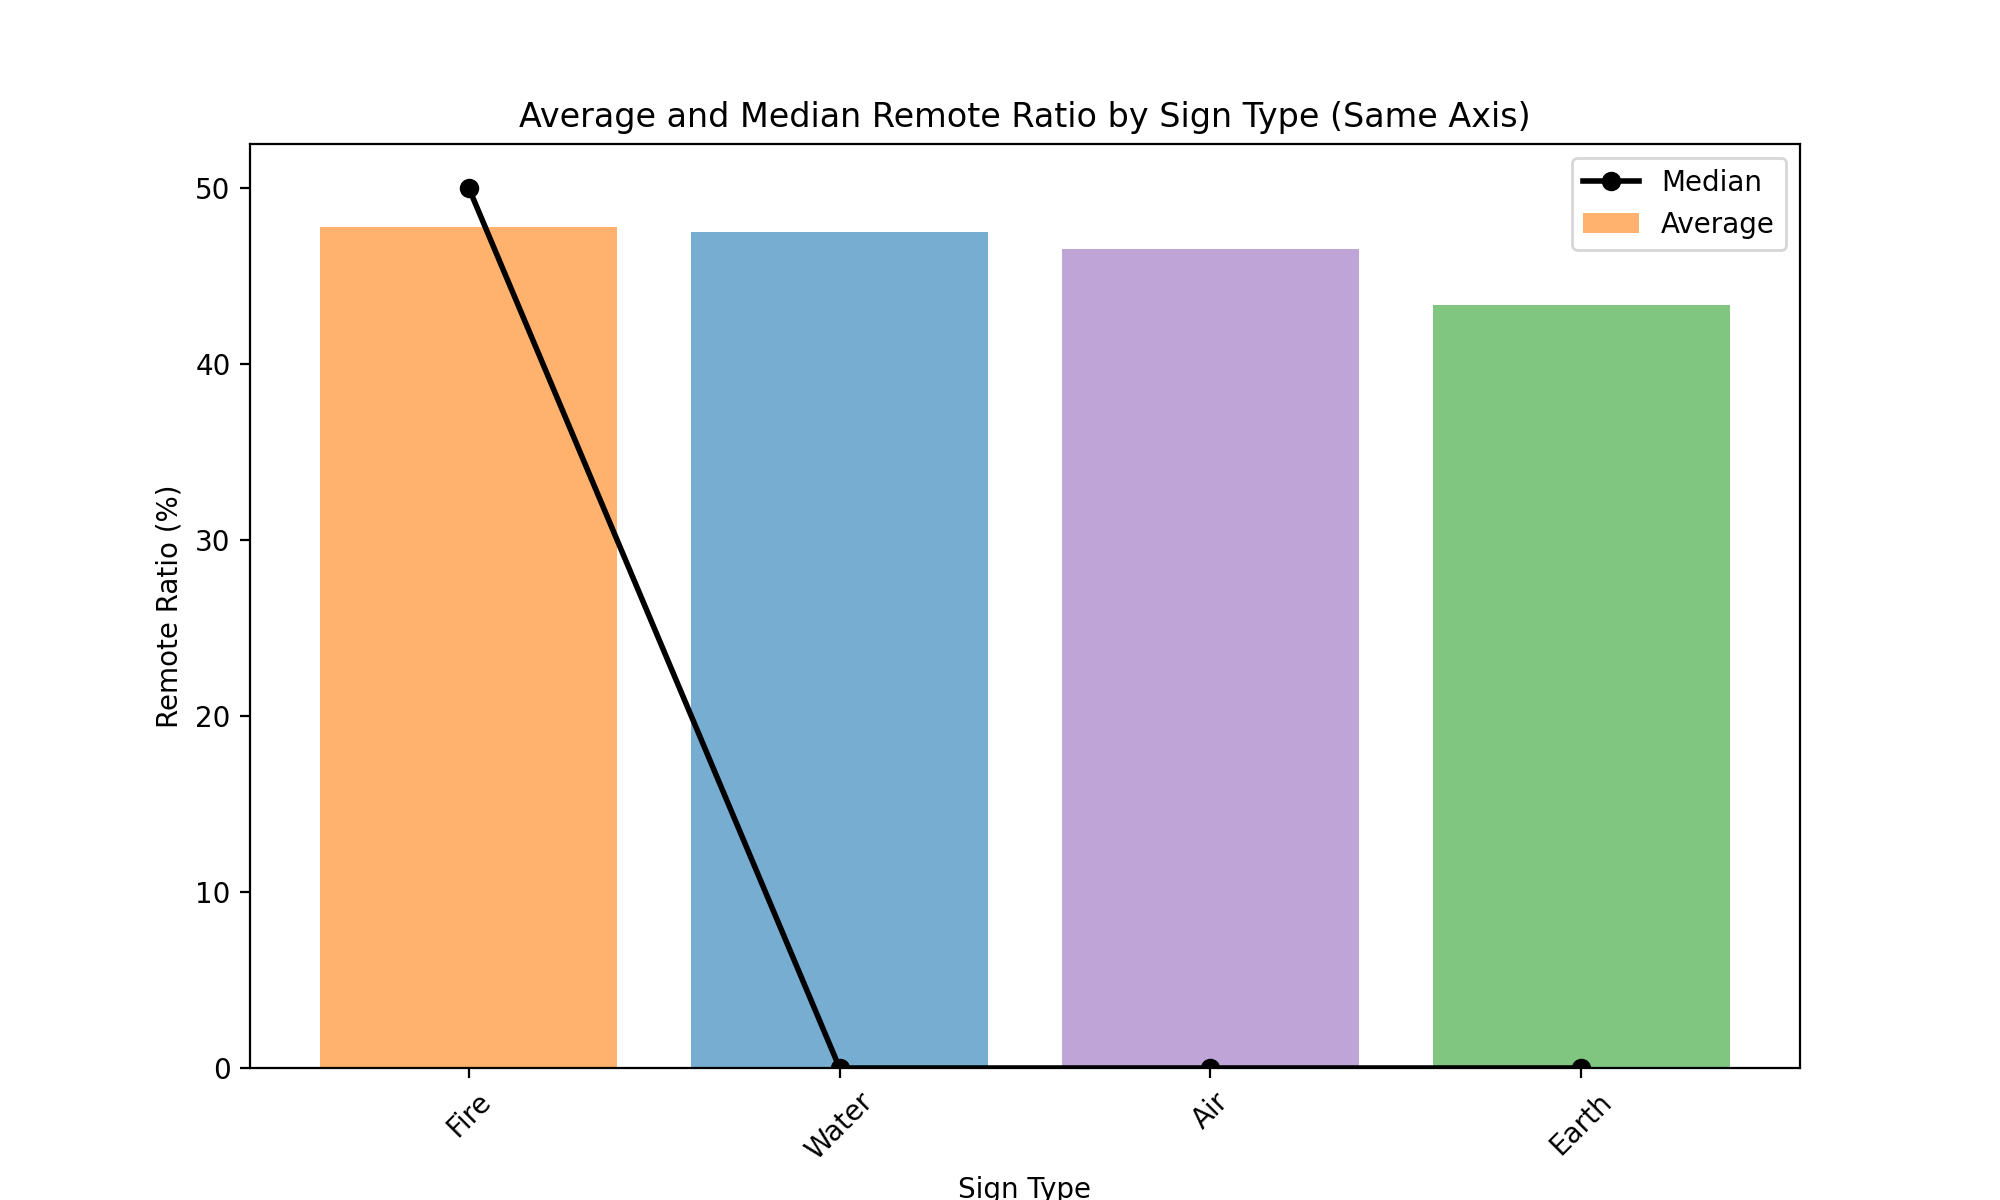

In [ ]:
#  ⁠⁠sun sign and job type: are air signs (usually looking for more creativity and flexibility) working remotely more than the other signs
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Define your sign colors
sign_colors = {
    'Fire': '#ff7f0e',  # Orange
    'Water': '#1f77b4',  # Blue
    'Air': '#9467bd',    # Purple
    'Earth': '#2ca02c'   # Green
}

# Calculate the average and median remote_ratio for each sign type
average_remote_ratio_by_sign_type = df.groupby('sign_type')['remote_ratio'].mean().sort_values(ascending=False)
median_remote_ratio_by_sign_type = df.groupby('sign_type')['remote_ratio'].median().reindex(average_remote_ratio_by_sign_type.index)

# Adjusting the visualization to use the same axis for both average and median remote_ratio
fig, ax = plt.subplots(figsize=(10, 6))

# Bar chart for average remote_ratio
bars = ax.bar(average_remote_ratio_by_sign_type.index, average_remote_ratio_by_sign_type, color=[sign_colors[sign] for sign in average_remote_ratio_by_sign_type.index], alpha=0.6, label='Average')

# Line graph for median remote_ratio on the same axis
ax.plot(median_remote_ratio_by_sign_type.index, median_remote_ratio_by_sign_type, marker='o', color='black', linewidth=2, label='Median')

# Titles and labels
plt.title('Average and Median Remote Ratio by Sign Type (Same Axis)')
ax.set_xlabel('Sign Type')
ax.set_ylabel('Remote Ratio (%)')
plt.xticks(rotation=45)

# Legend
ax.legend()

plt.show()


In [ ]:
#⁠⁠Jupyter in the 10th house is associated with abundance (and more money) compare it with the performance of the other houses
# Identify the top 10 most common job positions
top_10_positions = df['job_title'].value_counts().head(10).index.tolist()

# Filter the dataset for these top 10 positions
df_top_10_positions = df[df['job_title'].isin(top_10_positions)]

# Verify the top 10 positions and their count
top_10_positions_count = df['job_title'].value_counts().head(10)
top_10_positions_count


job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
Data Architect                101
Research Scientist             82
Data Science Manager           58
Applied Scientist              58
Research Engineer              37
Name: count, dtype: int64

In [ ]:
import seaborn as sns

# Identify the top 10 most common job positions
top_10_positions = df['job_title'].value_counts().head(10).index.tolist()

# Filter the dataset for these top 10 positions
df_top_10_positions = df[df['job_title'].isin(top_10_positions)]

# Aggregate the data to calculate the average salary for each combination of job position and Jupiter's house
salary_by_position_jupiter = df_top_10_positions.pivot_table(values='salary_in_usd', index='job_title', columns='Jupiter', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(salary_by_position_jupiter, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)

plt.title('Average Salary by Job Title and Jupiter House')
plt.xlabel('Jupiter House')
plt.ylabel('Job Title')

plt.show()


NameError: name 'plt' is not defined